In [1]:
import os

import numpy as np
from PIL import Image

In [2]:
images_dir = "previews"

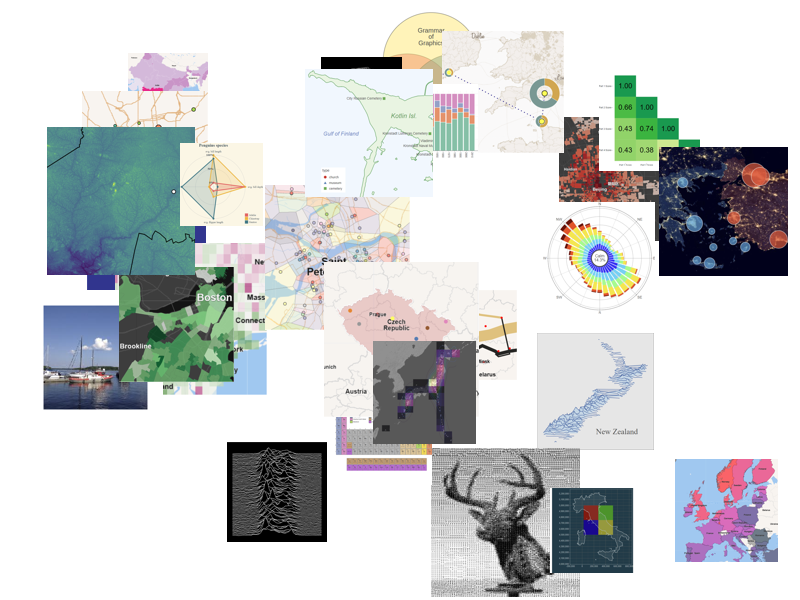

In [3]:
def get_data(canvas_size, size_range, seed=42):
    np.random.seed(seed)
    def get_image_data(image_name):
        size = np.random.randint(size_range[1] - size_range[0] + 1) + size_range[0]
        left = np.random.randint(canvas_size[0] - size + 1)
        top = np.random.randint(canvas_size[1] - size + 1)
        return dict(image=image_name, size=size, left=left, top=top)
    return [get_image_data(image_name) for image_name in os.listdir(images_dir)]

def get_preview(canvas_size, size_range, seed=42):
    canvas = Image.new("RGBA", canvas_size)
    for image_data in get_data(canvas_size, size_range, seed=seed):
        image = Image.open(os.path.join(images_dir, image_data['image']))
        canvas.paste(image.resize((image_data['size'], image_data['size'])), (image_data['left'], image_data['top']))
    return canvas

get_preview((800, 600), (80, 160), 0)